<a href="https://colab.research.google.com/github/ehtisham-Fazal/GDSC_23/blob/main/Image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

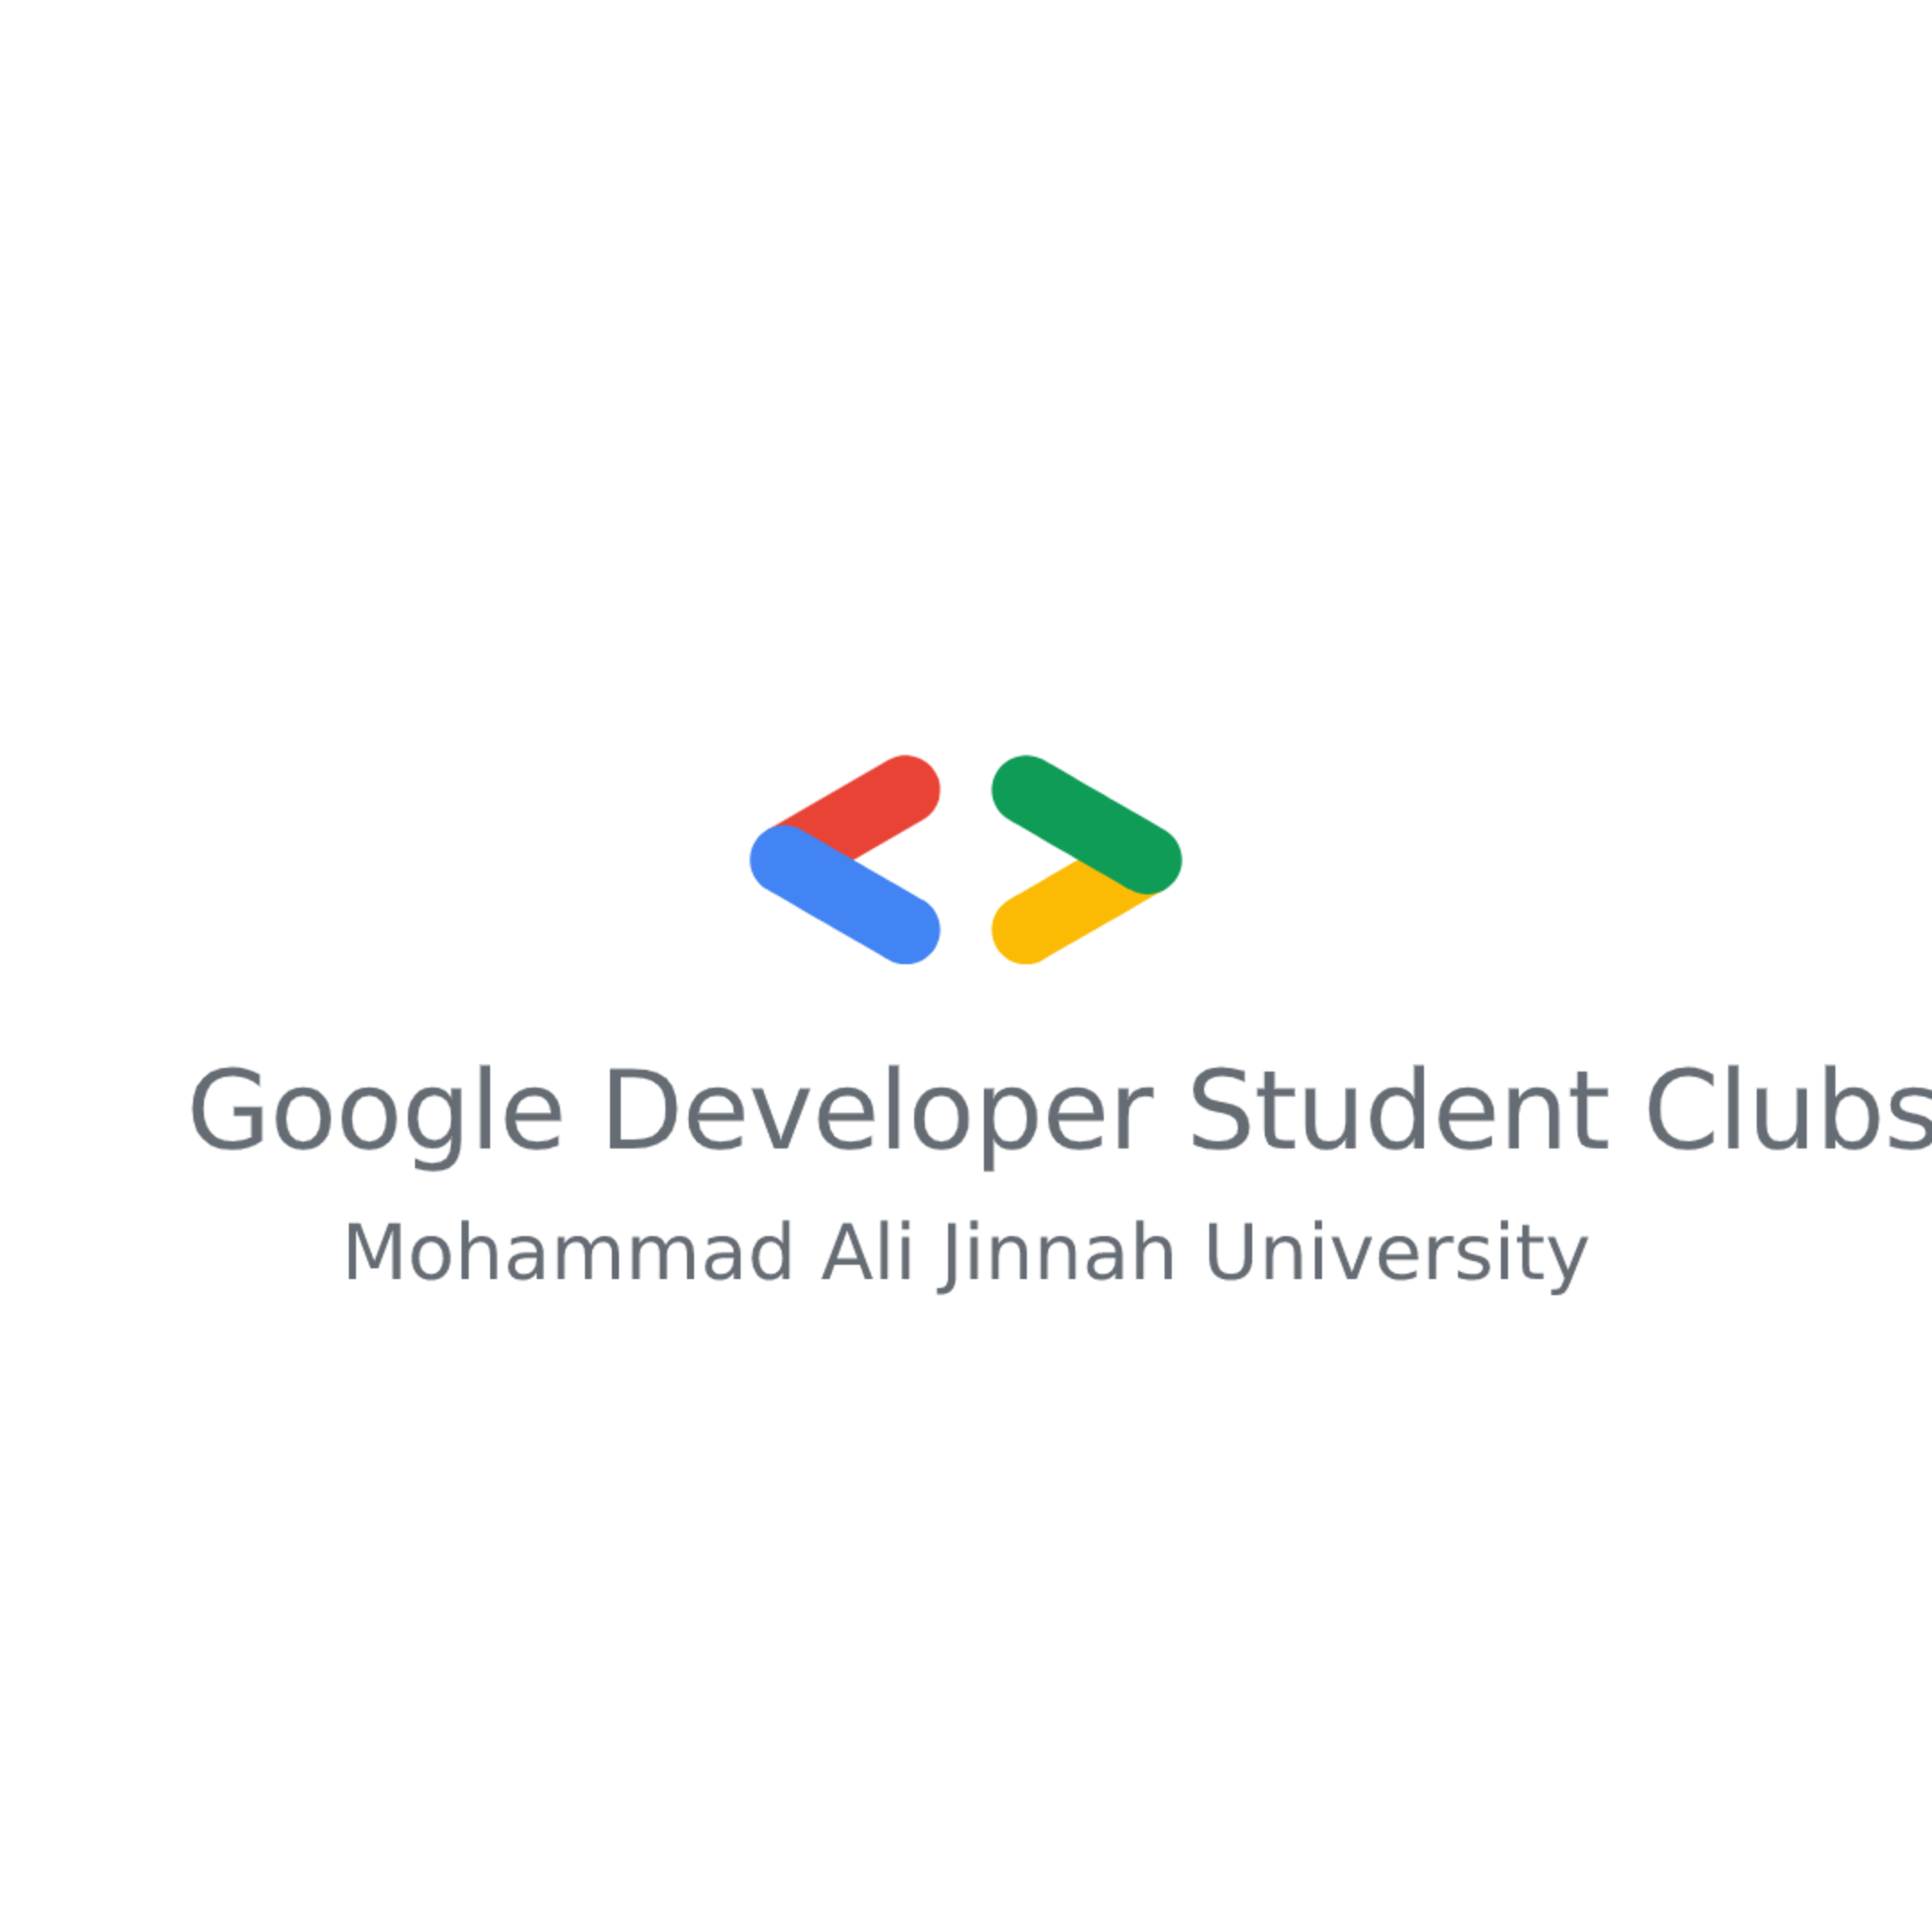

#1.gray scale image

install opencv library

In [87]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import cv2
from matplotlib import pyplot as plt

check version of open cv

In [89]:
print(cv2.__version__)

4.6.0


In [90]:
# Download and unzip our images
!wget https://drive.google.com/drive/folders/1f4fn9bnnZSh9w1g7wEQJJO_HAmmKpR9k?usp=sharing


--2023-03-17 20:14:14--  https://drive.google.com/drive/folders/1f4fn9bnnZSh9w1g7wEQJJO_HAmmKpR9k?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.251.111.101, 142.251.111.113, 142.251.111.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.111.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1f4fn9bnnZSh9w1g7wEQJJO_HAmmKpR9k?usp=sharing.2’

1f4fn9bnnZSh9w1g7wE     [ <=>                ] 215.00K  --.-KB/s    in 0.07s   

2023-03-17 20:14:14 (3.01 MB/s) - ‘1f4fn9bnnZSh9w1g7wEQJJO_HAmmKpR9k?usp=sharing.2’ saved [220160]



In [91]:
# Load an image using 'imread' specifying the path to image
image = cv2.imread(r'/content/cv.png')

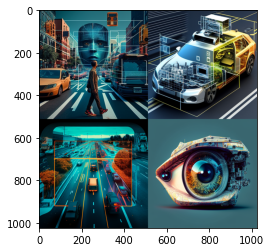

In [92]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Let's create a simple function to make displaying our images simpler and easier


In [93]:
def imshow(title = "", image = None):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

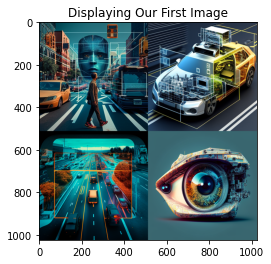

In [94]:
# Let's test it out
imshow("Displaying Our First Image", image)

In [95]:
# Simply use 'imwrite' specificing the file name and the image to be saved
cv2.imwrite('output.jpg', image)

True

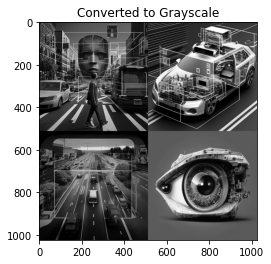

In [96]:
# We use cvtColor, to convert to grayscale
# It takes 2 arguments, the first being the input image
# The second being the color space conversion code 
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imshow("Converted to Grayscale", gray_image)

In [97]:
image.shape

(1024, 1024, 3)

In [98]:
print(gray_image.shape)

(1024, 1024)


#2. colour spaces

In [99]:
# Use cv2.split to get each color space separately
B, G, R = cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)

(1024, 1024)
(1024, 1024)
(1024, 1024)


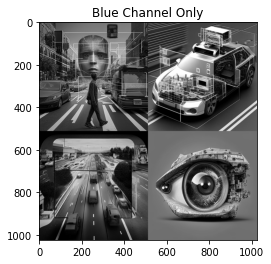

In [100]:
# Each color space on it's on will look like a grayscale as it lacks the other color channels
imshow("Blue Channel Only", B)

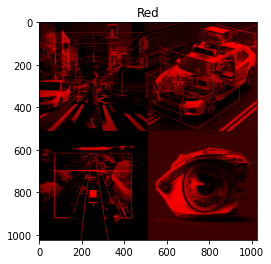

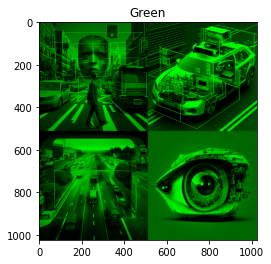

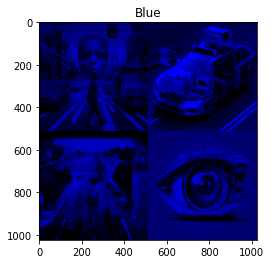

In [101]:
import numpy as np

# Let's create a matrix of zeros 
# with dimensions of the image h x w  
zeros = np.zeros(image.shape[:2], dtype = "uint8")

imshow("Red", cv2.merge([zeros, zeros, R]))
imshow("Green", cv2.merge([zeros, G, zeros]))
imshow("Blue", cv2.merge([B, zeros, zeros]))

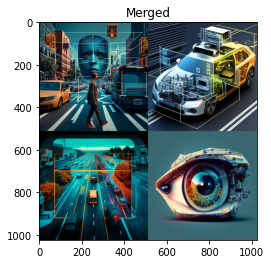

In [102]:
# OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)

# Let's re-make the original image, 
merged = cv2.merge([B, G, R]) 
imshow("Merged", merged) 

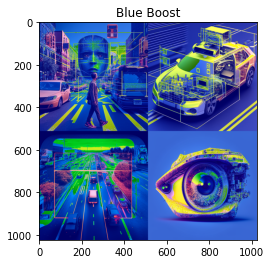

In [103]:
# Let's amplify the blue color
merged = cv2.merge([B+100, G, R])
imshow("Blue Boost", merged)

# 3. colour space

# Let's draw a line over our black square
cv2.line(image, starting cordinates, ending cordinates, color, thickness)






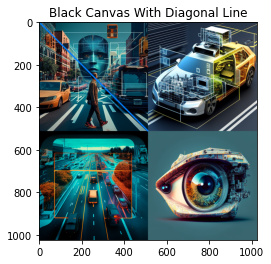

In [104]:
# Note this is an inplace operation, meaning it changes the input image
# Unlike many other OpenCV functions that return a new image leaving the input unaffected
# Remember our image was the black canvas
cv2.line(image, (0,0), (511,511), (255,127,0), 5)

imshow("Black Canvas With Diagonal Line", image)

# Drawing Rectangles
cv2.rectangle(image, starting vertex, opposite vertex, color, thickness)

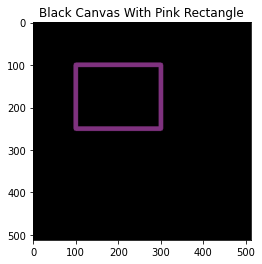

In [105]:
# Create our black canvas again because now it has a line in it
image = np.zeros((512,512,3), np.uint8)

# Thickness - if positive. Negative thickness means that it is filled
cv2.rectangle(image, (100,100), (300,250), (127,50,127), 10)
imshow("Black Canvas With Pink Rectangle", image)

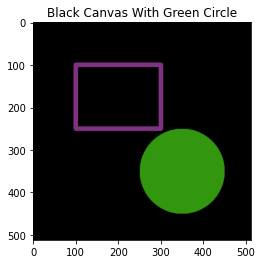

In [106]:
cv2.circle(image, (350, 350), 100, (15,150,50), -1) 
imshow("Black Canvas With Green Circle", image)

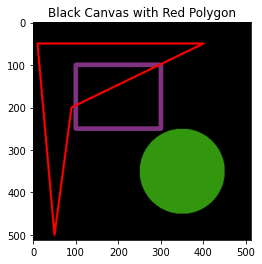

In [107]:
pts = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)
# Let's now reshape our points in form  required by polylines
pts = pts.reshape((-1,1,2))

cv2.polylines(image, [pts], True, (0,0,255), 3)
imshow("Black Canvas with Red Polygon", image)

### **And now for adding text with cv2.putText**

```cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)```

**Available Fonts**
- FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN
- FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX 
- FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL
- FONT_HERSHEY_SCRIPT_SIMPLEX
- FONT_HERSHEY_SCRIPT_COMPLEX

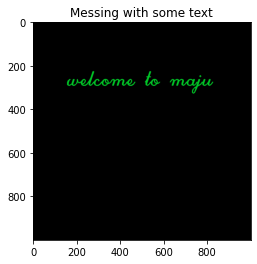

In [108]:
image = np.zeros((1000,1000,3), np.uint8)
ourString =  'welcome to maju'
cv2.putText(image, ourString, (155,290), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 3, (40,200,0), 4)
cv2.putText(image, ourString, (155,290), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 3, (40,200,0), 4)

imshow("Messing with some text", image)

# Exercise for all ❗

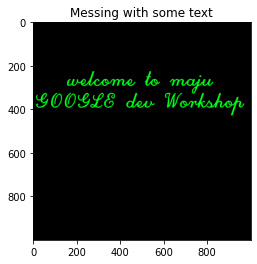

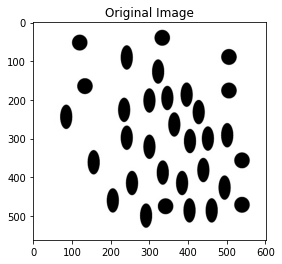

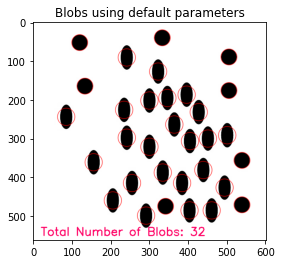

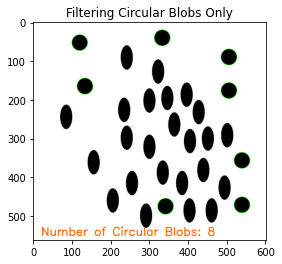

In [109]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image = cv2.imread("images/blobs.jpg", 0)
imshow('Original Image',image)

# Intialize the detector using the default parameters
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs
keypoints = detector.detect(image)
 
# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Total Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# Display image with blob keypoints
imshow("Blobs using default parameters", blobs)

# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True 
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2
    
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
    
# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
imshow("Filtering Circular Blobs Only", blobs)


# **Finding Waldo Using Template Matching**

#### **Notes on Template Matching**

There are a variety of methods to perform template matching, but in this case we are using the correlation coefficient which is specified by the flag **cv2.TM_CCOEFF.**

So what exactly is the cv2.matchTemplate function doing?
Essentially, this function takes a “sliding window” of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is. 

Regions with sufficiently high correlation can be considered “matches” for our waldo template.
From there, all we need is a call to cv2.minMaxLoc on Line 22 to find where our “good” matches are.
That’s really all there is to template matching!

http://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html      

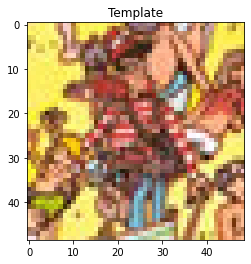

In [110]:
template = cv2.imread('./images/waldo.jpg')
imshow('Template', template)

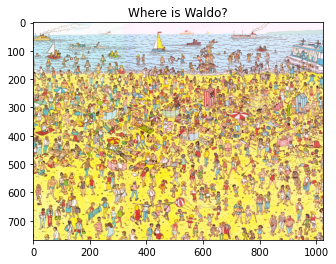

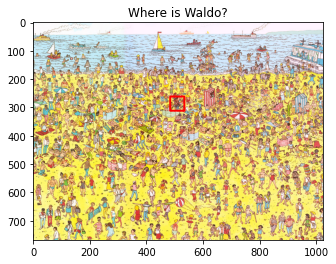

In [111]:
# Load input image and convert to grayscale
image = cv2.imread('./images/WaldoBeach.jpg')
imshow('Where is Waldo?', image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Template image
template = cv2.imread('./images/waldo.jpg',0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

imshow('Where is Waldo?', image)

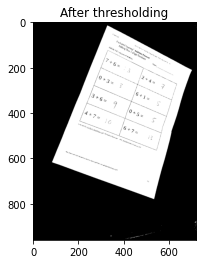

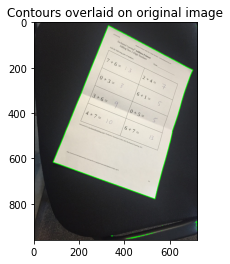

Number of Contours found = 54


In [112]:
image = cv2.imread('images/scan.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))


In [113]:
# Sort contours large to small by area

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# loop over the contours
for cnt in sorted_contours:
	# approximate the contour
	perimeter = cv2.arcLength(cnt, True)
	approx = cv2.approxPolyDP(cnt, 0.05 * perimeter, True)
 
	if len(approx) == 4:
		break

# Our x, y cordinates of the four corners 
print("Our 4 corner points are:")
print(approx)

Our 4 corner points are:
[[[326  15]]

 [[ 83 617]]

 [[531 779]]

 [[697 211]]]


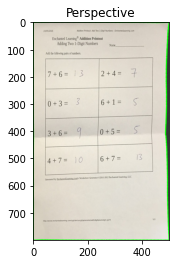

In [114]:
# Order obtained here is top left, bottom left, bottom right, top right
inputPts = np.float32(approx)

outputPts = np.float32([[0,0],
                       [0,800],
                       [500,800],
                       [500,0]])

# Get our Transform Matrix, M
M = cv2.getPerspectiveTransform(inputPts,outputPts)

# Apply the transform Matrix M using Warp Perspective
dst = cv2.warpPerspective(image, M, (500,800))

imshow("Perspective", dst)